In [1]:
import pandas as pd 
pd.set_option('max_columns', None)
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import math
from scipy.stats import pearsonr
import os

In [2]:
households = pd.read_csv('/Users/weijilim/Downloads/csv/hhpub.csv')
NY_households = households[households['HHSTATE'] == 'NY']
NY_households

,HOUSEID,TRAVDAY,SAMPSTRAT,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,PC,SPHONE,TAB,WALK,BIKE,CAR,TAXI,BUS,TRAIN,PARA,PRICE,PLACE,WALK2SAVE,BIKE2SAVE,PTRANS,HHRELATD,DRVRCNT,CNTTDHH,HHSTATE,HHSTFIPS,NUMADLT,YOUNGCHILD,WRKCOUNT,TDAYDATE,HHRESP,LIF_CYC,MSACAT,MSASIZE,RAIL,URBAN,URBANSIZE,URBRUR,SCRESP,CENSUS_D,CENSUS_R,CDIVMSAR,HH_RACE,HH_HISP,HH_CBSA,RESP_CNT,WEBUSE17,SMPLSRCE,WTHHFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
2,30000012,5,3,1,1,2,10,1,1,3,2,5,1,5,4,4,5,2,1,2,3,5,2,1,9,NY,36,1,0,1,201607,1,1,3,3,2,1,3,1,1,2,1,23,1,2,XXXXX,1,1,2,79.419586,C,80,17000,17000,5000,60,17000,7000
8,30000082,3,3,2,4,2,8,1,1,5,-9,5,1,5,5,5,5,3,3,5,5,5,1,2,12,NY,36,2,2,2,201605,1,4,3,3,2,1,3,1,1,2,1,23,1,2,XXXXX,4,1,2,1148.809332,T,20,1500,300,750,30,750,300
15,30000130,1,1,1,2,1,5,-9,1,-9,-9,-9,-1,-9,1,1,-9,1,1,1,-9,1,1,2,4,NY,36,2,0,2,201605,1,2,1,5,1,1,5,1,1,2,1,21,1,2,35620,2,1,1,3829.959655,U,60,30000,17000,5000,70,30000,17000
39,30000380,2,3,2,3,1,3,1,1,2,-9,-9,1,4,4,-9,-9,1,-9,-9,-9,-9,1,2,18,NY,36,2,0,1,201610,1,6,3,1,2,1,1,1,1,2,1,23,1,2,XXXXX,3,1,2,370.744472,S,50,3000,1500,1500,50,3000,1500
44,30000434,7,3,1,2,2,8,1,1,3,1,2,1,5,5,4,5,-9,2,2,3,3,1,2,6,NY,36,2,0,2,201605,1,2,3,2,2,4,6,2,1,2,1,23,1,2,XXXXX,2,1,2,101.472420,R,30,1500,750,750,30,750,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129645,40793685,1,3,1,2,1,5,2,1,1,-9,-9,1,-9,-9,-9,-9,4,4,4,4,4,1,2,5,NY,36,2,0,0,201703,1,10,3,2,2,1,1,1,1,2,1,23,1,2,XXXXX,2,1,2,84.081993,T,40,1500,750,750,30,1500,750
129651,40793808,7,3,1,3,3,7,1,1,3,1,4,1,5,4,5,5,3,3,3,3,3,1,2,16,NY,36,2,0,2,201612,2,8,3,1,2,1,1,1,1,2,1,23,1,2,XXXXX,3,1,2,141.856476,C,50,7000,3000,3000,50,3000,3000
129662,40793974,3,3,2,1,1,3,1,5,5,2,5,1,5,5,5,5,1,2,3,3,3,2,1,7,NY,36,1,0,0,201701,1,9,3,1,2,1,1,1,1,2,1,23,1,2,XXXXX,1,1,2,15.543410,R,20,300,300,150,20,300,50
129668,40794020,3,4,1,2,4,8,1,5,5,4,5,1,5,4,5,5,2,2,5,5,5,1,2,11,NY,36,2,0,0,201702,1,10,4,6,2,4,6,2,1,2,1,24,1,2,XXXXX,2,1,2,72.789109,R,5,50,50,25,5,50,50


In [3]:
NY_HH_IDS = NY_households['HOUSEID'].values.tolist()

In [4]:
personal = pd.read_csv('/Users/weijilim/Downloads/csv/perpub.csv')
# filter to NY Households 
NY_personal = personal[personal['HOUSEID'].isin(NY_HH_IDS)]
NY_personal

,HOUSEID,PERSONID,R_AGE,EDUC,R_HISP,R_RELAT,R_SEX,R_RACE,PRMACT,PAYPROF,GT1JBLWK,WRK_HOME,WKFTPT,WRKTRANS,LSTTRDAY17,OCCAT,SCHTYP,NWALKTRP,WALK4EX,NBIKETRP,BIKE4EX,BIKESHARE,PTUSED,MCUSED,CARSHARE,RIDESHARE,CARRODE,TIMETOWK,NOCONG,PUBTIME,WRKTIME,WKRMHM,FLEXTIME,WKFMHMXX,SCHTRN1,SCHTRN2,DELIVER,MEDCOND,MEDCOND6,HEALTH,PHYACT,VPACT,LPACT,BORNINUS,YRTOUS,YEARMILE,PROXY,WHOPROXY,USEPUBTR,SAMEPLC,W_NONE,W_CANE,W_WLKR,W_WHCANE,W_DOG,W_CRUTCH,W_SCOOTR,W_CHAIR,W_MTRCHR,WORKER,DIARY,OUTCNTRY,FRSTHM17,CNTTDTR,GCDWORK,WKSTFIPS,DRIVER,OUTOFTWN,DISTTOWK17,DISTTOSC17,R_AGE_IMP,R_SEX_IMP,ALT_16,ALT_23,ALT_45,WALK_DEF,WALK_GKQ,BIKE_DFR,BIKE_GKP,CONDTRAV,CONDRIDE,CONDNIGH,CONDRIVE,CONDPUB,CONDSPEC,CONDTAX,TRAVDAY,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,DRVRCNT,HHSTATE,HHSTFIPS,NUMADLT,WRKCOUNT,TDAYDATE,HHRESP,LIF_CYC,MSACAT,MSASIZE,RAIL,URBAN,URBANSIZE,URBRUR,CENSUS_D,CENSUS_R,CDIVMSAR,HH_RACE,HH_HISP,HH_CBSA,SMPLSRCE,WTPERFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
5,30000012,1,45,5,2,1,2,1,1,-1,2,2,1,3,-1,4,-1,6,6,0,-1,-1,0,-1,0,0,1,30,12,-1,07:30 AM,2,2,-1,-1,-1,5,2,-1,2,3,7,-1,1,-1,17000,1,1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,2,1,9,4.60,36,1,2,6.82,-9.00,45,2,3,1,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,5,1,1,2,10,1,NY,36,1,1,201607,1,1,3,3,2,1,3,1,2,1,23,1,2,XXXXX,2,58.966275,C,80,17000,17000,5000,60,17000,7000
16,30000082,1,39,5,2,1,2,1,1,-1,2,2,1,3,-1,2,-1,3,2,0,-1,-1,0,-1,0,0,1,4,3,-1,08:30 AM,1,1,2,-1,-1,3,2,-1,2,2,-1,2,1,-1,8000,1,1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,2,1,5,1.04,36,1,2,1.65,-9.00,39,2,1,1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,2,4,2,8,2,NY,36,2,2,201605,1,4,3,3,2,1,3,1,2,1,23,1,2,XXXXX,2,1028.814768,T,20,1500,300,750,30,750,300
17,30000082,2,38,4,2,2,1,1,1,-1,2,2,1,3,-1,4,-1,0,-1,0,-1,-1,0,-1,0,0,1,42,36,-1,08:45 AM,1,2,2,-1,-1,5,2,-1,2,2,-1,2,1,-1,15000,1,2,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,2,1,7,24.35,36,1,2,30.04,-9.00,38,1,3,1,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,2,4,2,8,2,NY,36,2,2,201605,1,4,3,3,2,1,3,1,2,1,23,1,2,XXXXX,2,1296.339345,T,20,1500,300,750,30,750,300
27,30000130,1,45,5,2,1,2,1,1,-1,2,2,1,11,-1,2,-1,5,5,0,-1,-1,20,-1,0,0,-9,60,-1,10,09:00 AM,2,2,-1,-1,-1,0,2,-1,3,2,-1,5,2,1995,-88,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,2,1,4,9.65,36,1,2,14.60,-9.00,45,2,3,4,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,2,1,5,2,NY,36,2,2,201605,1,2,1,5,1,1,5,1,2,1,21,1,2,35620,1,3705.493904,U,60,30000,17000,5000,70,30000,17000
28,30000130,2,45,4,2,2,1,1,1,-1,2,2,1,11,2,2,-1,6,6,0,-1,-1,5,-1,0,0,-9,60,-1,15,09:00 AM,2,2,-1,-1,-1,0,2,-1,2,3,6,-1,2,1995,6000,2,1,2,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,2,2,1,0,11.95,36,1,2,20.22,-9.00,45,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,2,1,5,2,NY,36,2,2,201605,1,2,1,5,1,1,5,1,2,1,21,1,2,35620,1,4361.900229,U,60,30000,17000,5000,70,30000,17000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264145,40793808,3,17,1,2,3,1,1,5,2,-1,-1,-1,-1,-1,-1,1,7,0,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,3,3,0,2,-1,1,2,-1,2,1,-1,-1,1,3,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,1,2,1,5,-9.00,-9,2,2,-9.00,2.17,17,1,4,4,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,7,1,3,3,7,2,NY,36,2,2,201612,2,8,3,1,2,1,1,1,2,1,23,1,2,XXXXX,2,106.020502,C,50,7000,3000,3000,50,3000,3000
264167,40793974,1,81,2,2,1,1,1,6,2,-1,-1,-1,-1,-1,-1,-1,0,-1,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,2,-1,2,2,-1,3,1,-1,9000,1,1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,1,2,1,7,-9.00,-9,1,2,-9.00,-9.00,81,1,2,1,4,-1,-1,-1,-1,2,2,1,2,2,2,2,3,2,1,1,3,1,NY,36,1,0,201701,1,9,3,1,2,1,1,1,2,1,23,1,2,XXXXX,2,14.522639,R,20,300,300,150,20,300,50
264175,40794020,1,75,3,2,1,1,1,6,2,-1,-1,-1,-1,-1,-1,-1,7,0,0,-1,-1,0,

In [5]:
#define function 
import seaborn as sns
def cat_col_prop(data, col):
    print(pd.concat([data[col].value_counts(),
          data[col].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage')))

    sns.countplot(data[col], order =  data[col].value_counts().index)

## Removal of features mentioned in the Household Analysis

For the 1st round of dropping, columns that was mentioned previously to be dropped will be dropped first. In addition, those features that were previously in the household set will be dropped as well.

In [6]:
cleaned_person = NY_personal.drop(columns=['CENSUS_D', 'CENSUS_R', 'HBHTNRNT', 'HBHUR', 'HBPPOPDN', 'HBRESDN', 'HHRESP', 'HHSTATE','HTEEMPDN','HH_HISP','HHSTFIPS','RAIL','HTHTNRNT', 'HTPPOPDN', 'HTRESDN','R_HISP','R_RACE','URBAN','URBANSIZE','URBRUR','R_RELAT','CDIVMSAR','HH_RACE','HOMEOWN','LIF_CYC','BORNINUS','HHRESP','WRKCOUNT','NUMADLT','WHOPROXY','USEPUBTR','PROXY'])
cleaned_person


,HOUSEID,PERSONID,R_AGE,EDUC,R_SEX,PRMACT,PAYPROF,GT1JBLWK,WRK_HOME,WKFTPT,WRKTRANS,LSTTRDAY17,OCCAT,SCHTYP,NWALKTRP,WALK4EX,NBIKETRP,BIKE4EX,BIKESHARE,PTUSED,MCUSED,CARSHARE,RIDESHARE,CARRODE,TIMETOWK,NOCONG,PUBTIME,WRKTIME,WKRMHM,FLEXTIME,WKFMHMXX,SCHTRN1,SCHTRN2,DELIVER,MEDCOND,MEDCOND6,HEALTH,PHYACT,VPACT,LPACT,YRTOUS,YEARMILE,SAMEPLC,W_NONE,W_CANE,W_WLKR,W_WHCANE,W_DOG,W_CRUTCH,W_SCOOTR,W_CHAIR,W_MTRCHR,WORKER,DIARY,OUTCNTRY,FRSTHM17,CNTTDTR,GCDWORK,WKSTFIPS,DRIVER,OUTOFTWN,DISTTOWK17,DISTTOSC17,R_AGE_IMP,R_SEX_IMP,ALT_16,ALT_23,ALT_45,WALK_DEF,WALK_GKQ,BIKE_DFR,BIKE_GKP,CONDTRAV,CONDRIDE,CONDNIGH,CONDRIVE,CONDPUB,CONDSPEC,CONDTAX,TRAVDAY,HHSIZE,HHVEHCNT,HHFAMINC,DRVRCNT,TDAYDATE,MSACAT,MSASIZE,HH_CBSA,SMPLSRCE,WTPERFIN
5,30000012,1,45,5,2,1,-1,2,2,1,3,-1,4,-1,6,6,0,-1,-1,0,-1,0,0,1,30,12,-1,07:30 AM,2,2,-1,-1,-1,5,2,-1,2,3,7,-1,-1,17000,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,2,1,9,4.60,36,1,2,6.82,-9.00,45,2,3,1,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,5,1,2,10,1,201607,3,3,XXXXX,2,58.966275
16,30000082,1,39,5,2,1,-1,2,2,1,3,-1,2,-1,3,2,0,-1,-1,0,-1,0,0,1,4,3,-1,08:30 AM,1,1,2,-1,-1,3,2,-1,2,2,-1,2,-1,8000,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,2,1,5,1.04,36,1,2,1.65,-9.00,39,2,1,1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,4,2,8,2,201605,3,3,XXXXX,2,1028.814768
17,30000082,2,38,4,1,1,-1,2,2,1,3,-1,4,-1,0,-1,0,-1,-1,0,-1,0,0,1,42,36,-1,08:45 AM,1,2,2,-1,-1,5,2,-1,2,2,-1,2,-1,15000,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,2,1,7,24.35,36,1,2,30.04,-9.00,38,1,3,1,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,4,2,8,2,201605,3,3,XXXXX,2,1296.339345
27,30000130,1,45,5,2,1,-1,2,2,1,11,-1,2,-1,5,5,0,-1,-1,20,-1,0,0,-9,60,-1,10,09:00 AM,2,2,-1,-1,-1,0,2,-1,3,2,-1,5,1995,-88,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,2,1,4,9.65,36,1,2,14.60,-9.00,45,2,3,4,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,2,1,5,2,201605,1,5,35620,1,3705.493904
28,30000130,2,45,4,1,1,-1,2,2,1,11,2,2,-1,6,6,0,-1,-1,5,-1,0,0,-9,60,-1,15,09:00 AM,2,2,-1,-1,-1,0,2,-1,2,3,6,-1,1995,6000,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,2,2,1,0,11.95,36,1,2,20.22,-9.00,45,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,2,1,5,2,201605,1,5,35620,1,4361.900229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264145,40793808,3,17,1,1,5,2,-1,-1,-1,-1,-1,-1,1,7,0,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,3,3,0,2,-1,1,2,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,1,2,1,5,-9.00,-9,2,2,-9.00,2.17,17,1,4,4,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,7,3,3,7,2,201612,3,1,XXXXX,2,106.020502
264167,40793974,1,81,2,1,6,2,-1,-1,-1,-1,-1,-1,-1,0,-1,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,2,-1,2,2,-1,3,-1,9000,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,1,2,1,7,-9.00,-9,1,2,-9.00,-9.00,81,1,2,1,4,-1,-1,-1,-1,2,2,1,2,2,2,2,3,1,1,3,1,201701,3,1,XXXXX,2,14.522639
264175,40794020,1,75,3,1,6,2,-1,-1,-1,-1,-1,-1,-1,7,0,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,2,-1,2,2,-1,4,-1,7000,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,1,2,1,6,-9.00,-9,1,2,-9.00,-9.00,75,1,4,1,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,2,4,8,2,201702,4,6,XXXXX,2,58.188893
264176,40794020,2,70,2,2,6,2,-1,-1,-1,-1,-1,-1,-1,7,0,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,4,2,-1,3,2,-1,7,-1,13000,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,1,2,1,5,-9.00,-9,1,2,-9.00,-9.00,70,2,4,1,4,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,2,4,8,2,201702,4,6,XXXXX,2,62.285639


In [7]:
# features relating to trip diary or a trip component
# for this, features relating to trip diary will be dropped as well.
# in addition, questions relating to a trip component will be dropped

cleaned_person = cleaned_person.drop(columns=['SMPLSRCE','SAMEPLC','HHFAMINC','HHVEHCNT','BIKE_DFR','BIKE_GKP','DIARY','DRIVER','DRVRCNT','OUTCNTRY','OUTOFTWN','PAYPROF','PRMACT','TDAYDATE','WALK4EX','WALK_DEF','WALK_GKQ','YEARMILE','YRTOUS','WTPERFIN','DELIVER','DRVRCNT','LSTTRDAY17','FRSTHM17','MSACAT','MSASIZE','HH_CBSA'])


## Metrics on Medical Condition - COND series, W Series, Health
There are some questions on the medical status of the households. This can be further explored. For the mode of medical device used, it is not useful so it will be dropped.

In [8]:
cleaned_person = cleaned_person.drop(columns=['W_CANE','W_CHAIR','W_CRUTCH','W_DOG', 'W_MTRCHR','W_NONE','W_SCOOTR','W_WHCANE','W_WLKR'])   



    counts  percentage
-1   29831   86.396548
 2    3408    9.870250
 1    1288    3.730306
-9       1    0.002896
    counts  percentage
-1   29831   86.396548
 2    4413   12.780931
 1     283    0.819625
-9       1    0.002896
    counts  percentage
 2   31106   90.089203
 1    3403    9.855769
-8      10    0.028962
-7       9    0.026066


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


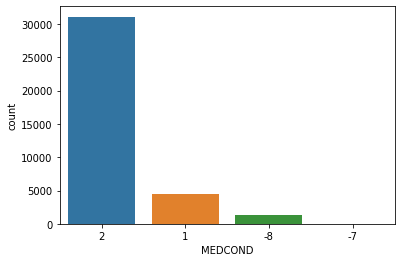

In [9]:
cat_col_prop(cleaned_person,'CONDNIGH')
cat_col_prop(cleaned_person,'CONDSPEC')
cat_col_prop(cleaned_person,'MEDCOND')

    counts  percentage
 2   12688   36.746988
 1   10333   29.926437
 3    8204   23.760426
 4    2620    7.588044
 5     650    1.882530
-7      18    0.052132
-8      15    0.043443


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


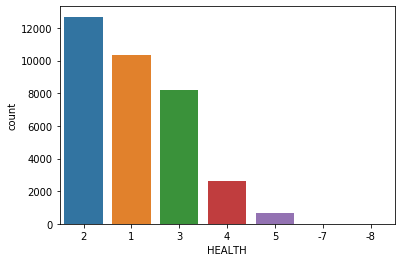

In [10]:
# most of the COND are skewed to skipping, which is reasonable 
# drop these features

cleaned_person = cleaned_person.drop(columns=['CONDNIGH','CONDPUB','CONDRIDE','CONDRIVE', 'CONDSPEC','CONDTAX','CONDTRAV','MEDCOND6','MEDCOND'])   

cat_col_prop(cleaned_person,'HEALTH')

In [11]:
cleaned_person

,HOUSEID,PERSONID,R_AGE,EDUC,R_SEX,GT1JBLWK,WRK_HOME,WKFTPT,WRKTRANS,OCCAT,SCHTYP,NWALKTRP,NBIKETRP,BIKE4EX,BIKESHARE,PTUSED,MCUSED,CARSHARE,RIDESHARE,CARRODE,TIMETOWK,NOCONG,PUBTIME,WRKTIME,WKRMHM,FLEXTIME,WKFMHMXX,SCHTRN1,SCHTRN2,HEALTH,PHYACT,VPACT,LPACT,WORKER,CNTTDTR,GCDWORK,WKSTFIPS,DISTTOWK17,DISTTOSC17,R_AGE_IMP,R_SEX_IMP,ALT_16,ALT_23,ALT_45,TRAVDAY,HHSIZE
5,30000012,1,45,5,2,2,2,1,3,4,-1,6,0,-1,-1,0,-1,0,0,1,30,12,-1,07:30 AM,2,2,-1,-1,-1,2,3,7,-1,1,9,4.60,36,6.82,-9.00,45,2,3,1,3,5,1
16,30000082,1,39,5,2,2,2,1,3,2,-1,3,0,-1,-1,0,-1,0,0,1,4,3,-1,08:30 AM,1,1,2,-1,-1,2,2,-1,2,1,5,1.04,36,1.65,-9.00,39,2,1,1,2,3,4
17,30000082,2,38,4,1,2,2,1,3,4,-1,0,0,-1,-1,0,-1,0,0,1,42,36,-1,08:45 AM,1,2,2,-1,-1,2,2,-1,2,1,7,24.35,36,30.04,-9.00,38,1,3,1,3,3,4
27,30000130,1,45,5,2,2,2,1,11,2,-1,5,0,-1,-1,20,-1,0,0,-9,60,-1,10,09:00 AM,2,2,-1,-1,-1,3,2,-1,5,1,4,9.65,36,14.60,-9.00,45,2,3,4,2,1,2
28,30000130,2,45,4,1,2,2,1,11,2,-1,6,0,-1,-1,5,-1,0,0,-9,60,-1,15,09:00 AM,2,2,-1,-1,-1,2,3,6,-1,1,0,11.95,36,20.22,-9.00,45,1,-1,-1,-1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264145,40793808,3,17,1,1,-1,-1,-1,-1,-1,1,7,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,3,3,1,2,-1,2,2,5,-9.00,-9,-9.00,2.17,17,1,4,4,4,7,3
264167,40793974,1,81,2,1,-1,-1,-1,-1,-1,-1,0,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,2,-1,3,2,7,-9.00,-9,-9.00,-9.00,81,1,2,1,4,3,1
264175,40794020,1,75,3,1,-1,-1,-1,-1,-1,-1,7,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,2,-1,4,2,6,-9.00,-9,-9.00,-9.00,75,1,4,1,4,3,2
264176,40794020,2,70,2,2,-1,-1,-1,-1,-1,-1,7,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,2,-1,7,2,5,-9.00,-9,-9.00,-9.00,70,2,4,1,4,3,2


   counts  percentage
2   18165   52.609476
1   16363   47.390524


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


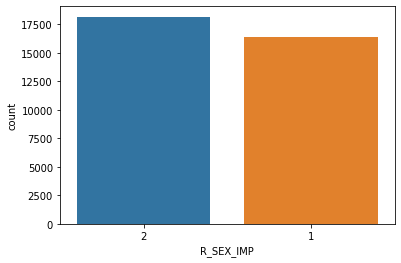

In [12]:
# Check Gender & Age
# cat_col_prop(cleaned_person,'R_AGE')
#cat_col_prop(cleaned_person,'R_AGE_IMP')
cat_col_prop(cleaned_person,'R_SEX_IMP')

For age, gender, the _impute do not have NA values, hence these columns will be used for the aggregation. Mean will be used for the age, while a gender ratio will be used for R_SEX_IMP

## Mean Age - Metric 1

In [13]:
#cleaned_person = cleaned_person.drop(columns=['R_AGE','R_SEX'])
# mean_age
mean_age = cleaned_person.groupby(['HOUSEID'])["R_AGE_IMP"].mean().reset_index(name="count")
mean_age

,HOUSEID,count
0,30000012,45.000000
1,30000082,38.500000
2,30000130,45.000000
3,30000380,37.333333
4,30000434,67.500000
...,...,...
17173,40793685,67.500000
17174,40793808,42.000000
17175,40793974,81.000000
17176,40794020,72.500000


## Percentage of Male Adults - Metric 2

          counts  percentage
0.500000    7236   54.951397
1.000000    2548   19.349939
0.333333    1206    9.158566
0.666667     816    6.196841
0.250000     523    3.971750
0.750000     268    2.035237
0.400000     207    1.571993
0.600000     125    0.949271
0.200000     109    0.827764
0.800000      44    0.334143
0.166667      19    0.144289
0.285714      17    0.129101
0.428571      11    0.083536
0.571429       9    0.068348
0.375000       7    0.053159
0.714286       5    0.037971
0.833333       5    0.037971
0.142857       4    0.030377
0.625000       3    0.022783
0.222222       1    0.007594
0.300000       1    0.007594
0.555556       1    0.007594
0.444444       1    0.007594
0.363636       1    0.007594
0.857143       1    0.007594


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


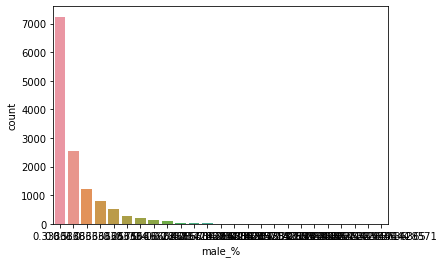

In [14]:
# gender ratio - % male adults 
male = cleaned_person.groupby(['HOUSEID','R_SEX_IMP','HHSIZE'])["R_SEX_IMP"].count().reset_index(name="count") # get the gender size
male = male[male['R_SEX_IMP'] == 1]
male['male_%'] = male['count']/male['HHSIZE']
cat_col_prop(male,'male_%')

      counts  percentage
0.5     7236   54.951397
1       2548   19.349939
<0.5    2107   16.000911
>0.5    1277    9.697752


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


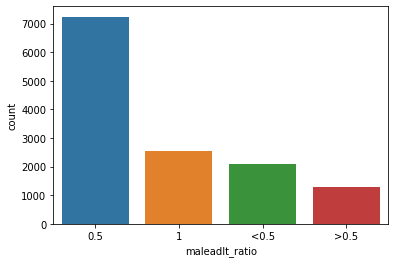

In [15]:
male['maleadlt_ratio'] = 'NA'
male.loc[male['male_%'].between(0,0.5,inclusive = False),'maleadlt_ratio'] = '<0.5'
male.loc[male['male_%'].between(0.5,1, inclusive = False),'maleadlt_ratio'] = '>0.5'
male.loc[male['male_%']==1,'maleadlt_ratio'] ='1'
male.loc[male['male_%']==0.5,'maleadlt_ratio'] ='0.5'
cat_col_prop(male,'maleadlt_ratio')

In [16]:
cleaned_person

,HOUSEID,PERSONID,R_AGE,EDUC,R_SEX,GT1JBLWK,WRK_HOME,WKFTPT,WRKTRANS,OCCAT,SCHTYP,NWALKTRP,NBIKETRP,BIKE4EX,BIKESHARE,PTUSED,MCUSED,CARSHARE,RIDESHARE,CARRODE,TIMETOWK,NOCONG,PUBTIME,WRKTIME,WKRMHM,FLEXTIME,WKFMHMXX,SCHTRN1,SCHTRN2,HEALTH,PHYACT,VPACT,LPACT,WORKER,CNTTDTR,GCDWORK,WKSTFIPS,DISTTOWK17,DISTTOSC17,R_AGE_IMP,R_SEX_IMP,ALT_16,ALT_23,ALT_45,TRAVDAY,HHSIZE
5,30000012,1,45,5,2,2,2,1,3,4,-1,6,0,-1,-1,0,-1,0,0,1,30,12,-1,07:30 AM,2,2,-1,-1,-1,2,3,7,-1,1,9,4.60,36,6.82,-9.00,45,2,3,1,3,5,1
16,30000082,1,39,5,2,2,2,1,3,2,-1,3,0,-1,-1,0,-1,0,0,1,4,3,-1,08:30 AM,1,1,2,-1,-1,2,2,-1,2,1,5,1.04,36,1.65,-9.00,39,2,1,1,2,3,4
17,30000082,2,38,4,1,2,2,1,3,4,-1,0,0,-1,-1,0,-1,0,0,1,42,36,-1,08:45 AM,1,2,2,-1,-1,2,2,-1,2,1,7,24.35,36,30.04,-9.00,38,1,3,1,3,3,4
27,30000130,1,45,5,2,2,2,1,11,2,-1,5,0,-1,-1,20,-1,0,0,-9,60,-1,10,09:00 AM,2,2,-1,-1,-1,3,2,-1,5,1,4,9.65,36,14.60,-9.00,45,2,3,4,2,1,2
28,30000130,2,45,4,1,2,2,1,11,2,-1,6,0,-1,-1,5,-1,0,0,-9,60,-1,15,09:00 AM,2,2,-1,-1,-1,2,3,6,-1,1,0,11.95,36,20.22,-9.00,45,1,-1,-1,-1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264145,40793808,3,17,1,1,-1,-1,-1,-1,-1,1,7,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,3,3,1,2,-1,2,2,5,-9.00,-9,-9.00,2.17,17,1,4,4,4,7,3
264167,40793974,1,81,2,1,-1,-1,-1,-1,-1,-1,0,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,2,-1,3,2,7,-9.00,-9,-9.00,-9.00,81,1,2,1,4,3,1
264175,40794020,1,75,3,1,-1,-1,-1,-1,-1,-1,7,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,2,-1,4,2,6,-9.00,-9,-9.00,-9.00,75,1,4,1,4,3,2
264176,40794020,2,70,2,2,-1,-1,-1,-1,-1,-1,7,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,2,-1,7,2,5,-9.00,-9,-9.00,-9.00,70,2,4,1,4,3,2


In [17]:
# drop physical activity 
#cleaned_person = cleaned_person.drop(columns = ['PHYACT','VPACT','LPACT'])
#check WKSTFIPS

#cat_col_prop(cleaned_person,'WKSTFIPS')
# will drop as most of info is -9, will use some other means for work
#cleaned_person = cleaned_person.drop(columns = ['WKSTFIPS'])



## MAX EDUC -> highest EDUCATION attained (metrics 3)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


    counts  percentage
5     5836   33.973687
3     4433   25.806264
4     3833   22.313424
2     2679   15.595529
1      389    2.264524
NA       8    0.046571


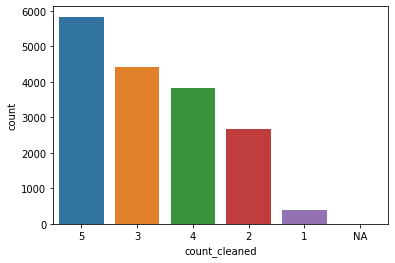

In [18]:
# to prevent the values from affecting the values, max is used 
max_educ = cleaned_person.groupby(['HOUSEID'])["EDUC"].max().reset_index(name="count")
#cat_col_prop(max_educ,'count')
max_educ['count_cleaned'] = max_educ['count'].replace({
-7:"NA"                    })
cat_col_prop(max_educ,'count_cleaned')

In [19]:
cleaned_person

,HOUSEID,PERSONID,R_AGE,EDUC,R_SEX,GT1JBLWK,WRK_HOME,WKFTPT,WRKTRANS,OCCAT,SCHTYP,NWALKTRP,NBIKETRP,BIKE4EX,BIKESHARE,PTUSED,MCUSED,CARSHARE,RIDESHARE,CARRODE,TIMETOWK,NOCONG,PUBTIME,WRKTIME,WKRMHM,FLEXTIME,WKFMHMXX,SCHTRN1,SCHTRN2,HEALTH,PHYACT,VPACT,LPACT,WORKER,CNTTDTR,GCDWORK,WKSTFIPS,DISTTOWK17,DISTTOSC17,R_AGE_IMP,R_SEX_IMP,ALT_16,ALT_23,ALT_45,TRAVDAY,HHSIZE
5,30000012,1,45,5,2,2,2,1,3,4,-1,6,0,-1,-1,0,-1,0,0,1,30,12,-1,07:30 AM,2,2,-1,-1,-1,2,3,7,-1,1,9,4.60,36,6.82,-9.00,45,2,3,1,3,5,1
16,30000082,1,39,5,2,2,2,1,3,2,-1,3,0,-1,-1,0,-1,0,0,1,4,3,-1,08:30 AM,1,1,2,-1,-1,2,2,-1,2,1,5,1.04,36,1.65,-9.00,39,2,1,1,2,3,4
17,30000082,2,38,4,1,2,2,1,3,4,-1,0,0,-1,-1,0,-1,0,0,1,42,36,-1,08:45 AM,1,2,2,-1,-1,2,2,-1,2,1,7,24.35,36,30.04,-9.00,38,1,3,1,3,3,4
27,30000130,1,45,5,2,2,2,1,11,2,-1,5,0,-1,-1,20,-1,0,0,-9,60,-1,10,09:00 AM,2,2,-1,-1,-1,3,2,-1,5,1,4,9.65,36,14.60,-9.00,45,2,3,4,2,1,2
28,30000130,2,45,4,1,2,2,1,11,2,-1,6,0,-1,-1,5,-1,0,0,-9,60,-1,15,09:00 AM,2,2,-1,-1,-1,2,3,6,-1,1,0,11.95,36,20.22,-9.00,45,1,-1,-1,-1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264145,40793808,3,17,1,1,-1,-1,-1,-1,-1,1,7,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,3,3,1,2,-1,2,2,5,-9.00,-9,-9.00,2.17,17,1,4,4,4,7,3
264167,40793974,1,81,2,1,-1,-1,-1,-1,-1,-1,0,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,2,-1,3,2,7,-9.00,-9,-9.00,-9.00,81,1,2,1,4,3,1
264175,40794020,1,75,3,1,-1,-1,-1,-1,-1,-1,7,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,2,-1,4,2,6,-9.00,-9,-9.00,-9.00,75,1,4,1,4,3,2
264176,40794020,2,70,2,2,-1,-1,-1,-1,-1,-1,7,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,2,-1,7,2,5,-9.00,-9,-9.00,-9.00,70,2,4,1,4,3,2


## look at travel questions, ALT16, 23, 45, WRKTRANS, SCHTRN2, SCHTRN1

For travel questions, ALT16, 23, 45, WRKTRANS, SCHTRNS, SCHTRN1 will be dropped as they might cause data leakage, e.g. if take a mode to school/work -> car owner or not

     counts  percentage
 0    29727   86.095343
-1     3302    9.563253
 2      386    1.117933
 1      381    1.103452
 3      171    0.495250
 5      131    0.379402
 4      124    0.359129
 10      73    0.211423
 6       56    0.162187
 8       38    0.110056
 15      27    0.078197
-8       19    0.055028
 20      18    0.052132
 7       14    0.040547
 12      12    0.034754
 9        9    0.026066
-7        7    0.020273
 16       5    0.014481
 14       5    0.014481
 50       4    0.011585
 30       4    0.011585
 40       2    0.005792
 11       2    0.005792
 51       1    0.002896
 19       1    0.002896
 17       1    0.002896
 65       1    0.002896
 70       1    0.002896
-9        1    0.002896
 75       1    0.002896
 13       1    0.002896
 25       1    0.002896
 22       1    0.002896
 42       1    0.002896


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


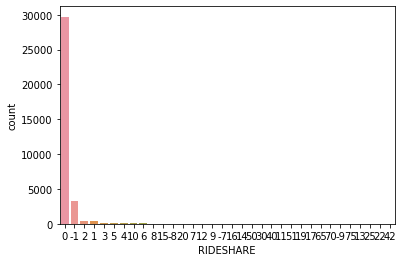

In [20]:


#cleaned_person = cleaned_person.drop(columns=['WRKTRANS','SCHTRN2','SCHTRN1','ALT_23','ALT_16','ALT_45'])


# for other trips 
# have to be careful of the negative values 
# walk trip no negative trips
#cat_col_prop(cleaned_person,'NWALKTRP')

# look at travday 
#cat_col_prop(cleaned_person,'TRAVDAY') # roughly the same, drop

#cat_col_prop(cleaned_person,'PTUSED') # roughly the same, drop
cat_col_prop(cleaned_person,'RIDESHARE') # roughly the same, drop



## Look at the work related questions - NOCONG, TIMETOWK, OCCAT, PUBTIME, WKRMHM, WRKTIME, WKFTPT

In [21]:
# work-related information 
cleaned_person = cleaned_person.drop(columns = ['NBIKETRP','BIKE4EX','BIKESHARE','TRAVDAY','R_AGE_IMP','R_SEX_IMP','EDUC'])

In [22]:
cleaned_person = cleaned_person.drop(columns = ['NWALKTRP','PTUSED'])

for NOCONG and TIMETOWK, it is the same so choose one, same as DISTTOWK17 and GDWORK


    counts  percentage
-1   18274   52.925162
 1   12523   36.269115
 2    3721   10.776761
-7       8    0.023170
-8       2    0.005792


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


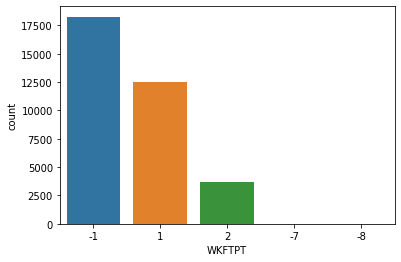

In [23]:
cat_col_prop(cleaned_person,'WKFTPT') 

# check for -1 if they are not workers 
people = cleaned_person[cleaned_person['WKFTPT'] == -1]
# not working -> could mean they are schooling as well 


In [24]:
#FT = cleaned_person.groupby(['HOUSEID','WKFTPT','HHSIZE'])["WKFTPT"].count().reset_index(name="count")

FT_max = cleaned_person.groupby(['HOUSEID','HHSIZE'])["WKFTPT"].max().reset_index(name="count")

non_working = pd.DataFrame(FT_max[FT_max['count'] == -1])

FT = cleaned_person.groupby(['HOUSEID','WKFTPT','HHSIZE'])["WKFTPT"].count().reset_index(name="count")
non_working_HH = non_working['HOUSEID'].tolist()
working = FT[-FT['HOUSEID'].isin(non_working_HH)]
working = working[working['WKFTPT']>0]
working['FT_ratio'] = np.where(working['WKFTPT']==2, 0, working['count']/working['HHSIZE'])
FT_cleaned = working.groupby(['HOUSEID','HHSIZE'])["FT_ratio"].sum().reset_index(name="count")
FT_cleaned

NA = FT_max[FT_max['count'] <-1]
NA

,HOUSEID,HHSIZE,count
2554,30160648,1,-7
4268,30264949,1,-7
6541,30401603,1,-8


In [44]:
#cat_col_prop(cleaned_person,'OCCAT') 
# split the categories up 
OCCAT = cleaned_person.groupby(['HOUSEID','OCCAT','HHSIZE'])["OCCAT"].count().reset_index(name="count")
OCCAT['2_ratio'] = np.where(OCCAT['OCCAT'].isin([2]), OCCAT['count']/OCCAT['HHSIZE'], 0)
OCCAT['1_ratio'] = np.where(OCCAT['OCCAT'].isin([1]), OCCAT['count']/OCCAT['HHSIZE'], 0)
OCCAT['3_ratio'] = np.where(OCCAT['OCCAT'].isin([3]), OCCAT['count']/OCCAT['HHSIZE'], 0)
OCCAT['4_ratio'] = np.where(OCCAT['OCCAT'].isin([4]), OCCAT['count']/OCCAT['HHSIZE'], 0)
OCCAT['97_ratio'] = np.where(OCCAT['OCCAT'].isin([97]), OCCAT['count']/OCCAT['HHSIZE'], 0)
OCCAT['NA_ratio'] = np.where(OCCAT['OCCAT'].isin([-7,-8]), OCCAT['count']/OCCAT['HHSIZE'], 0)
OCCAT['NOTWRK_ratio'] = np.where(OCCAT['OCCAT'].isin([-1,-9]), OCCAT['count']/OCCAT['HHSIZE'], 0)


#OCCAT_working['prof_ratio'] = np.where(OCCAT_working['OCCAT'].isin([2,3,1,97]), 0, OCCAT_working['count']/OCCAT_working['HHSIZE'])
#OCCAT_working['prof_ratio'] = np.where(OCCAT_working['OCCAT'].isin([2,3,1,97]), 0, OCCAT_working['count']/OCCAT_working['HHSIZE'])
#OCCAT_working['prof_ratio'] = np.where(OCCAT_working['OCCAT'].isin([2,3,1,97]), 0, OCCAT_working['count']/OCCAT_working['HHSIZE'])
#OCCAT_working['prof_ratio'] = np.where(OCCAT_working['OCCAT'].isin([2,3,1,97]), 0, OCCAT_working['count']/OCCAT_working['HHSIZE'])


OCCAT_cleaned = OCCAT.groupby(['HOUSEID','HHSIZE'])['1_ratio','2_ratio','3_ratio','4_ratio','97_ratio','NOTWRK_ratio','NA_ratio'].sum().reset_index()








/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,HOUSEID,HHSIZE,1_ratio,2_ratio,3_ratio,4_ratio,97_ratio,NOTWRK_ratio,NA_ratio
0,30000012,1,0.000000,0.00,0.0,1.000000,0.0,0.000000,0.0
1,30000082,4,0.000000,0.25,0.0,0.250000,0.0,0.000000,0.0
2,30000130,2,0.000000,1.00,0.0,0.000000,0.0,0.000000,0.0
3,30000380,3,0.333333,0.00,0.0,0.000000,0.0,0.666667,0.0
4,30000434,2,0.000000,0.00,0.0,1.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
17173,40793685,2,0.000000,0.00,0.0,0.000000,0.0,1.000000,0.0
17174,40793808,3,0.000000,0.00,0.0,0.666667,0.0,0.333333,0.0
17175,40793974,1,0.000000,0.00,0.0,0.000000,0.0,1.000000,0.0
17176,40794020,2,0.000000,0.00,0.0,0.000000,0.0,1.000000,0.0


In [45]:
OCCAT

,HOUSEID,OCCAT,HHSIZE,count,2_ratio,1_ratio,3_ratio,4_ratio,97_ratio,NA_ratio,NOTWRK_ratio
0,30000012,4,1,1,0.00,0.0,0.0,1.000000,0.0,0.0,0.000000
1,30000082,2,4,1,0.25,0.0,0.0,0.000000,0.0,0.0,0.000000
2,30000082,4,4,1,0.00,0.0,0.0,0.250000,0.0,0.0,0.000000
3,30000130,2,2,2,1.00,0.0,0.0,0.000000,0.0,0.0,0.000000
4,30000380,-1,3,2,0.00,0.0,0.0,0.000000,0.0,0.0,0.666667
...,...,...,...,...,...,...,...,...,...,...,...
25588,40793808,-1,3,1,0.00,0.0,0.0,0.000000,0.0,0.0,0.333333
25589,40793808,4,3,2,0.00,0.0,0.0,0.666667,0.0,0.0,0.000000
25590,40793974,-1,1,1,0.00,0.0,0.0,0.000000,0.0,0.0,1.000000
25591,40794020,-1,2,2,0.00,0.0,0.0,0.000000,0.0,0.0,1.000000


In [26]:
OCCAT_NA = OCCAT_max[OCCAT_max['count'] <-1]
OCCAT_NA

OCCAT_working = OCCAT[-OCCAT['HOUSEID'].isin(non_working_HH)]
OCCAT_working['prof_ratio'] = np.where(OCCAT_working['OCCAT'].isin([2,3,1,97]), 0, OCCAT_working['count']/OCCAT_working['HHSIZE'])
OCCAT_cleaned = OCCAT_working.groupby(['HOUSEID','HHSIZE'])["prof_ratio"].sum().reset_index(name="count")
OCCAT_cleaned

,HOUSEID,HHSIZE,count
122,30008251,2,-9
248,30015784,2,-9
362,30022892,1,-9
389,30024583,1,-9
498,30031217,1,-9
...,...,...,...
16366,40714771,1,-9
16382,40715604,1,-9
16399,40717483,2,-9
16408,40718101,2,-9


     counts  percentage
-1    17584   50.926784
 4     8906   25.793559
 1     3517   10.185936
 3     1950    5.647590
 2     1853    5.366659
-9      690    1.998378
 97      20    0.057924
-8        5    0.014481
-7        3    0.008689
-1 and -9 sum up to the -1 in WKFTPT.


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


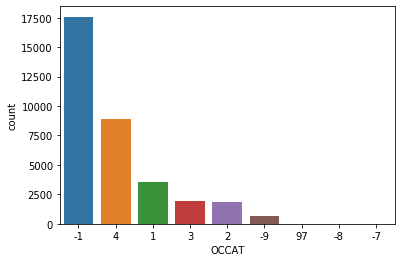

In [47]:
cat_col_prop(cleaned_person,'OCCAT') 
print('-1 and -9 sum up to the -1 in WKFTPT.')

    counts  percentage
 1   16944   49.073216
 2   14280   41.357739
-1    3302    9.563253
-9       2    0.005792


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


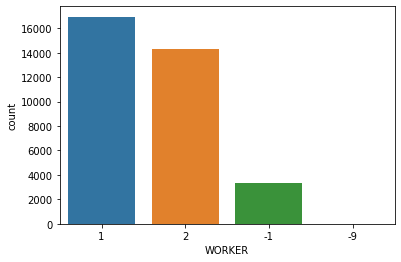

In [50]:
cat_col_prop(cleaned_person,'WORKER') 
# -1 could mean a 

In [52]:
cleaned_person['TIMETOWK'].value_counts()
# this might mean that they do not need to travel out for work, which can be seen in time to work

time = cleaned_person[['HOUSEID','PERSONID','TIMETOWK','WKFTPT','SCHTYP']].copy()

-1      20090
 15      1885
 20      1763
 10      1448
 30      1321
        ...  
 170        1
 88         1
 420        1
 59         1
 210        1
Name: TIMETOWK, Length: 112, dtype: int64

In [97]:
time = cleaned_person[['HOUSEID','PERSONID','TIMETOWK','WKFTPT','SCHTYP']].copy()
positive_time = time[time['TIMETOWK']>=0]
mean_time = positive_time.groupby('HOUSEID')['TIMETOWK'].mean().reset_index()
positive_HH_IDs = mean_time['HOUSEID'].to_list()
negative_time = time[time['TIMETOWK']<0]
negative_time =negative_time[-negative_time['HOUSEID'].isin(positive_HH_IDs)]

In [82]:
negative_check = negative_time.groupby('HOUSEID')['TIMETOWK'].min().reset_index()
negative_check # put them as NA

,HOUSEID,TIMETOWK
0,30000496,-1
1,30000817,-1
2,30001011,-1
3,30001039,-1
4,30001053,-1
...,...,...
7411,40792021,-1
7412,40793685,-1
7413,40793974,-1
7414,40794020,-1


            counts  percentage
15.000000      992   10.161852
20.000000      956    9.793075
10.000000      738    7.559926
30.000000      710    7.273100
25.000000      614    6.289695
...            ...         ...
12.666667        1    0.010244
2.666667         1    0.010244
103.500000       1    0.010244
26.250000        1    0.010244
48.750000        1    0.010244

[291 rows x 2 columns]


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


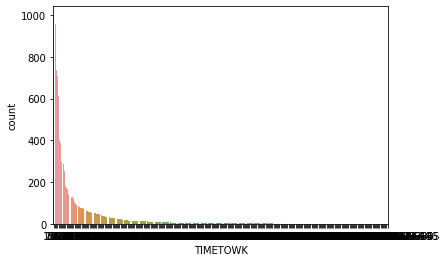

In [83]:
cat_col_prop(mean_time,'TIMETOWK') 

In [114]:
bins = [0, 10, 20, 30, 3000]
bins_label = ['<=10','10 - 20','20 - 30','>30']
mean_time['binned'] = pd.cut(mean_time['TIMETOWK'], bins, labels = bins_label,include_lowest=True)



In [129]:
cleaned_person[cleaned_person['WRKTIME']=='-7']

,HOUSEID,PERSONID,R_AGE,R_SEX,GT1JBLWK,WRK_HOME,WKFTPT,WRKTRANS,OCCAT,SCHTYP,MCUSED,CARSHARE,RIDESHARE,CARRODE,TIMETOWK,NOCONG,PUBTIME,WRKTIME,WKRMHM,FLEXTIME,WKFMHMXX,SCHTRN1,SCHTRN2,HEALTH,PHYACT,VPACT,LPACT,WORKER,CNTTDTR,GCDWORK,WKSTFIPS,DISTTOWK17,DISTTOSC17,ALT_16,ALT_23,ALT_45,HHSIZE,WRKTIME_HOUR
6332,30025610,2,53,2,2,1,1,-9,4,-1,-1,0,0,-1,-1,-1,-1,-7,-1,1,-1,-1,-1,3,2,-1,1,1,0,-9.00,-9,-9.00,-9.0,4,1,2,2,-7
17773,30070435,1,39,2,2,2,-7,1,1,-1,-1,0,0,-9,0,-1,-1,-7,-7,-7,-1,-1,-1,4,2,-1,5,1,6,8.30,36,12.03,-9.0,1,4,4,4,-7
19720,30078137,1,74,1,2,1,2,-9,4,-1,-1,0,0,-1,-1,-1,-1,-7,-1,-7,-1,-1,-1,3,3,5,-1,1,2,-9.00,-9,-9.00,-9.0,3,1,4,2,-7
22405,30088919,1,50,1,2,2,1,3,4,-1,-1,0,0,1,12,10,-1,-7,2,2,-1,-1,-1,2,2,-1,3,1,5,3.97,36,6.62,-9.0,3,4,2,1,-7
22813,30090538,1,47,1,1,2,1,1,4,-1,-1,0,0,-9,1,-1,-1,-7,1,1,30,-1,-1,2,2,-1,3,1,5,3.20,36,4.31,-9.0,4,4,2,2,-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250796,40707442,1,84,1,2,1,2,-9,4,-1,-1,0,0,-1,-1,-1,-1,-7,-1,1,-1,-1,-1,1,3,6,-1,1,3,-9.00,-9,-9.00,-9.0,2,1,4,2,-7
251763,40713153,1,41,1,1,1,-7,-9,4,-1,-1,0,0,-1,-1,-1,-1,-7,-1,1,-1,-1,-1,3,2,-1,4,1,2,-9.00,-9,-9.00,-9.0,4,1,3,4,-7
254066,40727377,2,51,2,2,1,1,-9,4,-1,-1,0,0,-1,-1,-1,-1,-7,-1,1,-1,-1,-1,2,2,-1,7,1,1,-9.00,-9,-9.00,-9.0,2,3,3,2,-7
254570,40730607,2,66,1,2,1,1,-9,2,-1,-1,0,0,-1,-1,-1,-1,-7,-1,1,-1,-1,-1,1,3,14,-1,1,2,-9.00,-9,-9.00,-9.0,1,4,3,2,-7


In [187]:
start_time = cleaned_person[['HOUSEID','PERSONID','WRKTIME']].copy()
start_time['WRKTIME_AMPM'] = start_time['WRKTIME'].apply(lambda x: (str(x[-2:])))
start_time['WRKTIME_HOUR'] = start_time['WRKTIME'].apply(lambda x: int(str(x[:2])))
start_time['WRKTIME_HOUR_cleaned'] = np.where(start_time['WRKTIME_AMPM'] == 'PM',start_time['WRKTIME_HOUR'] + 12, start_time['WRKTIME_HOUR'])
start_time['WRKTIME_HOUR_cleaned'] = np.where(start_time['WRKTIME_HOUR'] == 12,start_time['WRKTIME_HOUR'], start_time['WRKTIME_HOUR_cleaned'])
start_time[start_time['WRKTIME_AMPM'] == 'PM']

,HOUSEID,PERSONID,WRKTIME,WRKTIME_AMPM,WRKTIME_HOUR,WRKTIME_HOUR_cleaned
78,30000380,2,06:00 PM,PM,6,18
94,30000439,4,04:00 PM,PM,4,16
641,30002883,3,12:00 PM,PM,12,12
659,30002989,2,01:00 PM,PM,1,13
776,30003489,1,02:50 PM,PM,2,14
...,...,...,...,...,...,...
263464,40789044,5,05:00 PM,PM,5,17
263537,40789513,2,04:00 PM,PM,4,16
263771,40791091,2,05:45 PM,PM,5,17
264028,40792952,4,05:00 PM,PM,5,17


In [188]:
# 17584 corresponds to OCCAT
# None from -7,-8

earliest_time = start_time.groupby(['HOUSEID','WRKTIME_HOUR_cleaned']).count().reset_index()
earliest_time

,HOUSEID,WRKTIME_HOUR_cleaned,PERSONID,WRKTIME,WRKTIME_AMPM,WRKTIME_HOUR
0,30000012,7,1,1,1,1
1,30000082,8,2,2,2,2
2,30000130,9,2,2,2,2
3,30000380,-1,2,2,2,2
4,30000380,18,1,1,1,1
...,...,...,...,...,...,...
26899,40793808,7,1,1,1,1
26900,40793808,9,1,1,1,1
26901,40793974,-1,1,1,1,1
26902,40794020,-1,2,2,2,2


In [194]:
time_plus = earliest_time[earliest_time['WRKTIME_HOUR_cleaned']>=0]
early_start = time_plus.groupby(['HOUSEID'])['WRKTIME_HOUR_cleaned'].min().reset_index()
early_start_ids = early_start['HOUSEID'].to_list()

In [195]:
negative_sttime = earliest_time[earliest_time['WRKTIME_HOUR_cleaned'] < 0]
negative_sttime = negative_sttime[-negative_sttime['HOUSEID'].isin(early_start_ids)]

In [196]:
negative_sttime = negative_sttime.groupby(['HOUSEID'])['WRKTIME_HOUR'].min().reset_index()
negative_sttime

,HOUSEID,WRKTIME_HOUR
0,30001011,2
1,30001039,1
2,30001053,2
3,30001349,1
4,30001381,2
...,...,...
6689,40792021,2
6690,40793685,2
6691,40793974,1
6692,40794020,2


In [197]:
early_start

,HOUSEID,WRKTIME_HOUR_cleaned
0,30000012,7
1,30000082,8
2,30000130,9
3,30000380,18
4,30000434,8
...,...,...
10479,40792952,8
10480,40793204,14
10481,40793555,6
10482,40793669,8


    counts  percentage
-1   20090   58.184662
 2   11934   34.563253
 1    2486    7.199954
-7      11    0.031858
-8       7    0.020273


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


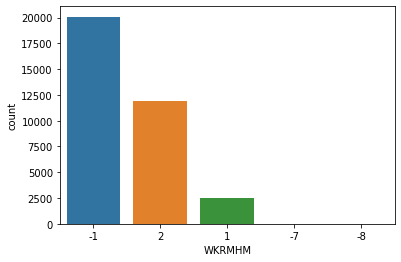

In [199]:
cat_col_prop(cleaned_person,'WKRMHM') 

In [220]:
flex = cleaned_person[['HOUSEID','PERSONID','WRK_HOME','HHSIZE']].copy()
flex_grouped = flex.groupby(['HOUSEID','WRK_HOME','HHSIZE']).count().reset_index()

In [221]:
flex_grouped

,HOUSEID,WRK_HOME,HHSIZE,PERSONID
0,30000012,2,1,1
1,30000082,2,4,2
2,30000130,2,2,2
3,30000380,-1,3,2
4,30000380,2,3,1
...,...,...,...,...
23534,40793808,1,3,1
23535,40793808,2,3,1
23536,40793974,-1,1,1
23537,40794020,-1,2,2


In [222]:
flex_plus_max = flex_grouped[flex_grouped['WRK_HOME']>0]
flex_plus_max['yes_wfh'] = np.where(flex_plus_max['WRK_HOME'] == 2,0, flex_plus_max['PERSONID']/flex_plus_max['HHSIZE'] )

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [227]:
flex_plus_max = flex_grouped[flex_grouped['WRK_HOME']<0]
flex_HH = flex_plus_max.groupby(['HOUSEID'])["yes_wfh"].sum().reset_index(name="count") 



          counts  percentage
0.000000    8988   84.545198
0.500000     714    6.716207
1.000000     376    3.536826
0.333333     230    2.163484
0.250000     200    1.881291
0.200000      54    0.507948
0.666667      36    0.338632
0.166667      13    0.122284
0.400000       7    0.065845
0.142857       6    0.056439
0.125000       3    0.028219
0.750000       2    0.018813
0.600000       1    0.009406
0.285714       1    0.009406


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


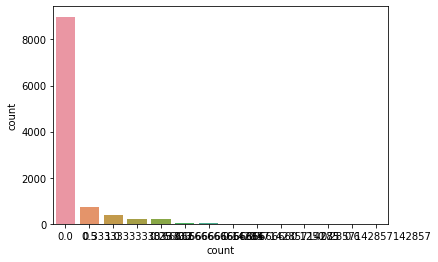

In [229]:
flex_HH
cat_col_prop(flex_HH,'count')

In [244]:
#cat_col_prop(cleaned_person,'DISTTOWK17')
dist = cleaned_person[['HOUSEID','PERSONID','DISTTOWK17']].copy()
dist_plus = dist[dist['DISTTOWK17']>=0]
average_dist = dist_plus.groupby(['HOUSEID'])['DISTTOWK17'].mean().reset_index(name="count") 
average_dist_IDs = average_dist['HOUSEID'].tolist()

In [251]:
dist_minus = dist[dist['DISTTOWK17']<0]
dist_minus = dist_minus[-dist_minus['HOUSEID'].isin(average_dist_IDs)]
dist_minus = dist_minus.groupby(['HOUSEID'])['DISTTOWK17'].min().reset_index(name="count") 
dist_minus

,HOUSEID,count
0,30000496,-9.0
1,30000817,-9.0
2,30001011,-9.0
3,30001039,-9.0
4,30001053,-9.0
...,...,...
7401,40792021,-9.0
7402,40793685,-9.0
7403,40793974,-9.0
7404,40794020,-9.0


               counts  percentage
>15 miles        3174   32.480557
<=5 miles        2833   28.990995
5-10 miles       2228   22.799836
10 - 15 miles    1537   15.728612


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


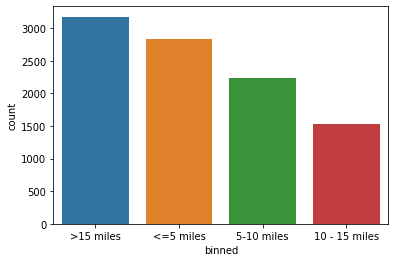

In [266]:
dist_bins = [0, 5, 10, 15, 3000]
dist_bins_label = ['<=5 miles','5-10 miles','10 - 15 miles','>15 miles']
average_dist['binned'] = pd.cut(average_dist['count'], dist_bins, labels = dist_bins_label,include_lowest=True)

cat_col_prop(average_dist,'binned')
